## Importing the data and defining some variables

The first step will be importing the relevant python libraries. Open CV will be used instead of PIL. The use of tqdm is to visualize loops in a graphical way. As seen in the last line of this cell, the model name will depend on the size of the learning rate and on the architecture of the neural network.   

In [1]:
import cv2
import numpy as np
import os 
from random import shuffle
from tqdm import tqdm

TRAIN_DIR = r'C:\Users\52551\Desktop\CatDogClassifier\train'
TEST_DIR = r'C:\Users\52551\Desktop\CatDogClassifier\test\test'
IMG_SIZE = 50
LR = 1e-3 

MODEL_NAME = 'dogvscats--{}--{}.model'.format(LR,'conv-basic')

## Labelling images

Let's label the cat and dogs images that we have in our training file. 

In [2]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat':return [1,0]
    elif word_label == 'dog':return [0,1]

## Creating training data

We will put all our training data in one single array that will contain the resized image on grayscale along its label.

In [3]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data                     
        

## Creating testing data

Same as above but for testing data.

In [4]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img),img_num])
    np.save('test_data.npy', testing_data)
    return testing_data

## Creating or loading training data

Creating our training data. If already exists just load it.

In [5]:
train_data = create_train_data()
#if you already have train data:
#train_data = np.load('train_data.npy', allow_pickle=True)


C:\Users\52551\anaconda3\envs\tf\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


## Define the model (we ignore the warnings)

Creating a CNN. I choosed this parameters for the CNN based on the results of my code OptimizerCNN.py where I tested different CNN's and selected the best one.

In [6]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

C:\Users\52551\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\52551\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\52551\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\52551\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dty

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [7]:
# if the model already exists, just load it
#if os.path.exists('{}.meta'.format(MODEL_NAME)):
   # model.load(MODEL_NAME)
    #print('model loaded!')

## Data segmentation

Segmenting training data before actually training our model.

In [8]:
train = train_data[:-500]
test = train_data[-500:]

In [9]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]


## Saving the arrays with pickle so we dont process everytime


import pickle
X = np.array(X)
y = np.array(Y)
pickle.dump(X, open('X.pkl','wb'))
pickle.dump(y, open('y.pkl','wb'))


## Training that model!!

In [10]:
model.fit({'input': X}, {'targets': Y}, n_epoch=10, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 3829  | total loss: 0.32836 | time: 45.110s
| Adam | epoch: 010 | loss: 0.32836 - acc: 0.8702 -- iter: 24448/24500
Training Step: 3830  | total loss: 0.33445 | time: 46.263s
| Adam | epoch: 010 | loss: 0.33445 - acc: 0.8613 | val_loss: 0.50512 - val_acc: 0.8020 -- iter: 24500/24500
--


In [11]:
#model.save(MODEL_NAME)

Now that we have seen that everything is working fine, let's tune the model. Using the OptimizerCNN.py and tensorboard, let's check all the posible combinations among the three dense layers, three convolutional layers and four sizes of nodes. After the tuning, we have the results that appear on the file 'Images' of this repository.

Among all those models, lets choose the best ones. And do a bit of analysis on them:

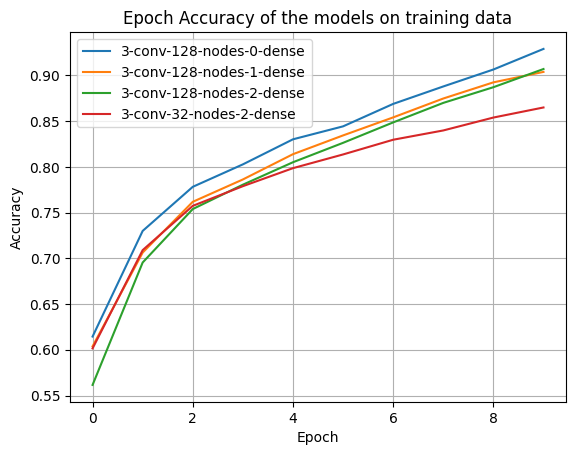

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
mod1 = pd.read_csv('run-3-conv-128-nodes-0-dense-1666479596_train-tag-epoch_accuracy.csv')
mod2 = pd.read_csv('run-3-conv-128-nodes-1-dense-1666484510_train-tag-epoch_accuracy.csv')
mod3 = pd.read_csv('run-3-conv-128-nodes-2-dense-1666489484_train-tag-epoch_accuracy.csv')
mod4 = pd.read_csv('run-3-conv-32-nodes-2-dense-1666486321_train-tag-epoch_accuracy.csv')
plt.plot(mod1['Step'],mod1['Value'])
plt.plot(mod2['Step'],mod2['Value'])
plt.plot(mod3['Step'],mod3['Value'])
plt.plot(mod4['Step'],mod4['Value'])
plt.title('Epoch Accuracy of the models on training data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['3-conv-128-nodes-0-dense', '3-conv-128-nodes-1-dense', '3-conv-128-nodes-2-dense', '3-conv-32-nodes-2-dense'])
plt.grid()
plt.show()

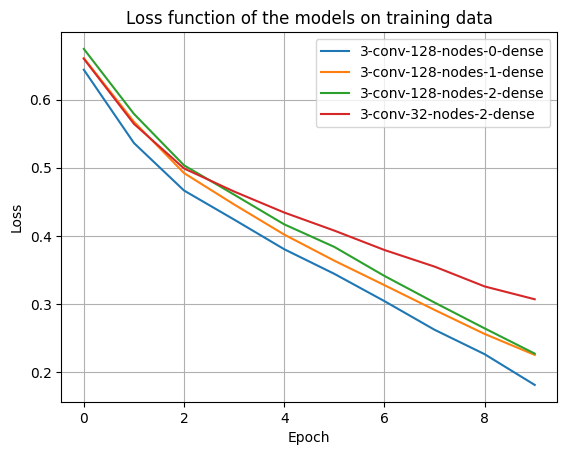

In [13]:
mod5 = pd.read_csv('run-3-conv-128-nodes-0-dense-1666479596_train-tag-epoch_loss.csv')
mod6 = pd.read_csv('run-3-conv-128-nodes-1-dense-1666484510_train-tag-epoch_loss.csv')
mod7 = pd.read_csv('run-3-conv-128-nodes-2-dense-1666489484_train-tag-epoch_loss.csv')
mod8 = pd.read_csv('run-3-conv-32-nodes-2-dense-1666486321_train-tag-epoch_loss.csv')
plt.plot(mod5['Step'],mod5['Value'])
plt.plot(mod6['Step'],mod6['Value'])
plt.plot(mod7['Step'],mod7['Value'])
plt.plot(mod8['Step'],mod8['Value'])
plt.title('Loss function of the models on training data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['3-conv-128-nodes-0-dense', '3-conv-128-nodes-1-dense', '3-conv-128-nodes-2-dense', '3-conv-32-nodes-2-dense'])
plt.grid()
plt.show()

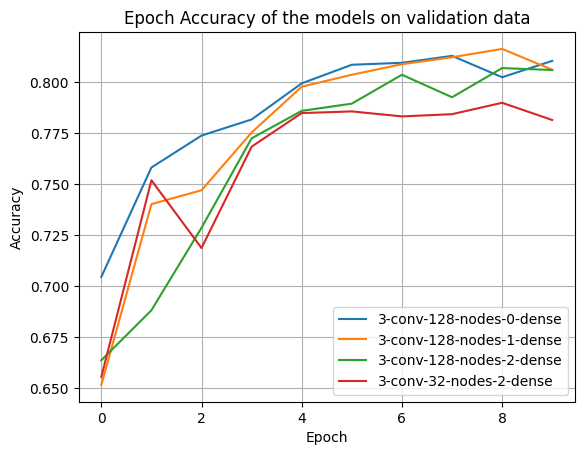

In [14]:
mod9 = pd.read_csv('run-3-conv-128-nodes-0-dense-1666479596_validation-tag-epoch_accuracy.csv')
mod10 = pd.read_csv('run-3-conv-128-nodes-1-dense-1666484510_validation-tag-epoch_accuracy.csv')
mod11 = pd.read_csv('run-3-conv-128-nodes-2-dense-1666489484_validation-tag-epoch_accuracy.csv')
mod12 = pd.read_csv('run-3-conv-32-nodes-2-dense-1666486321_validation-tag-epoch_accuracy.csv')
plt.plot(mod9['Step'],mod9['Value'])
plt.plot(mod10['Step'],mod10['Value'])
plt.plot(mod11['Step'],mod11['Value'])
plt.plot(mod12['Step'],mod12['Value'])
plt.title('Epoch Accuracy of the models on validation data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['3-conv-128-nodes-0-dense', '3-conv-128-nodes-1-dense', '3-conv-128-nodes-2-dense', '3-conv-32-nodes-2-dense'])
plt.grid()
plt.show()

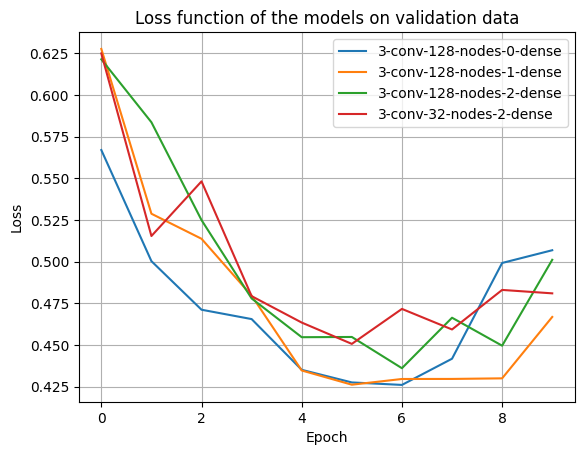

In [15]:
mod13 = pd.read_csv('run-3-conv-128-nodes-0-dense-1666479596_validation-tag-epoch_loss.csv')
mod14 = pd.read_csv('run-3-conv-128-nodes-1-dense-1666484510_validation-tag-epoch_loss.csv')
mod15 = pd.read_csv('run-3-conv-128-nodes-2-dense-1666489484_validation-tag-epoch_loss.csv')
mod16 = pd.read_csv('run-3-conv-32-nodes-2-dense-1666486321_validation-tag-epoch_loss.csv')
plt.plot(mod13['Step'],mod13['Value'])
plt.plot(mod14['Step'],mod14['Value'])
plt.plot(mod15['Step'],mod15['Value'])
plt.plot(mod16['Step'],mod16['Value'])
plt.title('Loss function of the models on validation data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['3-conv-128-nodes-0-dense', '3-conv-128-nodes-1-dense', '3-conv-128-nodes-2-dense', '3-conv-32-nodes-2-dense'])
plt.grid()
plt.show()

We have solid reasons to believe that a CNN with 3 convolutional layers, one dense layer and 128 nodes might be a pretty good model. Let's see the confussion matrix of that model

In [16]:
y_true = np.array(test_y)
y_predict = model.predict(test_x)
y_predict = (y_predict > 0.5).astype(np.int_)
predict = []
reali = []
for i in range(0,len(y_true)):
    if np.array_equal(y_true[i], [1,0]):
        reali.append('cat')
    else:
        reali.append('dog')
    if np.array_equal(y_predict[i], [1,0]):
        predict.append('cat')
    else:
        predict.append('dog')


In [17]:
df = pd.crosstab(np.array(predict), np.array(reali), normalize='index')

<AxesSubplot:xlabel='col_0', ylabel='row_0'>

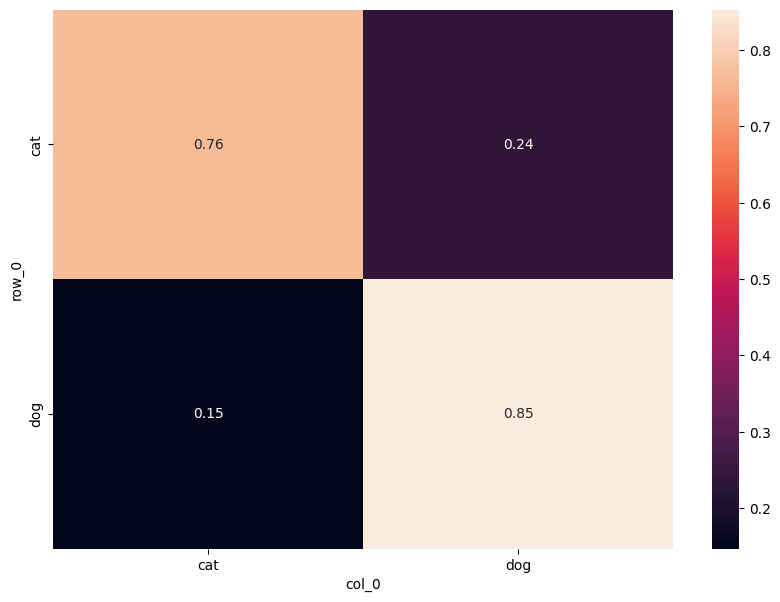

In [18]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(df, annot=True)

In conclusion, the model is not that bad!